In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

<h1>DATA FRAMES</h1>

In [2]:
accident = pd.read_csv('dataset//accident_data.csv')

In [3]:
accident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,5/6/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2/7/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,3/9/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18-02-2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21-02-2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23-02-2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23-02-2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


In [4]:
accident['Accident Date'] = pd.to_datetime(accident['Accident Date'], dayfirst = True, errors = 'coerce')

In [5]:
accident.dtypes

Index                              object
Accident_Severity                  object
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                   object
District Area                      object
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions            object
Road_Type                          object
Urban_or_Rural_Area                object
Weather_Conditions                 object
Vehicle_Type                       object
dtype: object

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot: Bar chart for weather conditions affecting accidents
plt.figure(figsize=(6, 4))
sns.countplot(y="Weather_Conditions", data=df, palette="muted", 
              order=df["Weather_Conditions"].value_counts().index)
plt.title("Accidents by Weather Conditions")
plt.xlabel("Count")
plt.ylabel("Weather Conditions")
plt.show()


NameError: name 'df' is not defined

<Figure size 600x400 with 0 Axes>

In [6]:
accident.isnull().sum()

Index                           0
Accident_Severity               0
Accident Date              395672
Latitude                       25
Light_Conditions                0
District Area                   0
Longitude                      26
Number_of_Casualties            0
Number_of_Vehicles              0
Road_Surface_Conditions       726
Road_Type                    4520
Urban_or_Rural_Area            15
Weather_Conditions          14128
Vehicle_Type                    0
dtype: int64

<h1>Categorical Data Fields</h1>

In [7]:
accident['Accident Date'] = accident['Accident Date'].astype('str')
accident['Light_Conditions'] = accident['Light_Conditions'].astype('category')
accident['Accident_Severity'] = accident['Accident_Severity'].astype('category')
accident['District Area'] = accident['District Area'].astype('category')
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].astype('category')
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].astype('category')
accident['Road_Type'] = accident['Road_Type'].astype('category')
accident['Weather_Conditions'] = accident['Weather_Conditions'].astype('category')
accident['Vehicle_Type'] = accident['Vehicle_Type'].astype('category')
accident['Latitude'] = accident['Latitude'].astype('category')
accident['Longitude'] = accident['Longitude'].astype('category')

<h1>Converting Data Field into DATE TIME data type</h1>

In [8]:
accident.dtypes

Index                        object
Accident_Severity          category
Accident Date                object
Latitude                   category
Light_Conditions           category
District Area              category
Longitude                  category
Number_of_Casualties          int64
Number_of_Vehicles            int64
Road_Surface_Conditions    category
Road_Type                  category
Urban_or_Rural_Area        category
Weather_Conditions         category
Vehicle_Type               category
dtype: object

In [9]:
accident['Accident Date'] = accident['Accident Date'].str.strip()
accident['Accident Date'] = accident['Accident Date'].str.replace('/','-')


In [10]:
accident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,2019-06-05,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2019-07-02,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,NaT,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,NaT,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,2019-09-03,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,NaT,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,NaT,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,NaT,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,NaT,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


In [11]:
accident['Accident Date'] = pd.to_datetime(accident['Accident Date'], dayfirst = True, errors = 'coerce')

In [12]:
accident.dtypes

Index                              object
Accident_Severity                category
Accident Date              datetime64[ns]
Latitude                         category
Light_Conditions                 category
District Area                    category
Longitude                        category
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions          category
Road_Type                        category
Urban_or_Rural_Area              category
Weather_Conditions               category
Vehicle_Type                     category
dtype: object

In [13]:
accident['Accident Date'] = pd.to_datetime(accident['Accident Date'], dayfirst = True, errors = 'coerce')

In [14]:
accident['Accident Date']

0        2019-05-06
1        2019-02-07
2               NaT
3               NaT
4        2019-03-09
            ...    
660674          NaT
660675          NaT
660676          NaT
660677          NaT
660678          NaT
Name: Accident Date, Length: 660679, dtype: datetime64[ns]

In [15]:
accident['Latitude'] =accident['Latitude'].fillna(accident['Latitude'].mode()[0])

In [16]:
accident['Longitude'] =accident['Longitude'].fillna(accident['Longitude'].mode()[0])

In [17]:
accident['Urban_or_Rural_Area'] =accident['Urban_or_Rural_Area'].fillna(accident['Urban_or_Rural_Area'].mode()[0])

In [18]:
accident['Road_Type'] =accident['Road_Type'].fillna(accident['Road_Type'].mode()[0])

In [19]:
accident['Weather_Conditions'] =accident['Weather_Conditions'].fillna(accident['Weather_Conditions'].mode()[0])

In [20]:
accident['Accident Date'] =accident['Accident Date'].fillna(accident['Accident Date'].mode()[0])

In [21]:
accident['Road_Surface_Conditions'] =accident['Road_Surface_Conditions'].fillna(accident['Road_Surface_Conditions'].mode()[0])

In [22]:
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

In [23]:
df_rainy = accident[accident['Weather_Conditions'] == 'Rain']

In [24]:
df_rainy

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type


In [25]:
df_daylight = accident[accident['Light_Conditions'] == 'daylight']

In [26]:
df_daylight

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type


In [27]:
accident['Accident_Severity'].value_counts() 

Accident_Severity
Slight     563801
Serious     88217
Fatal        8661
Name: count, dtype: int64

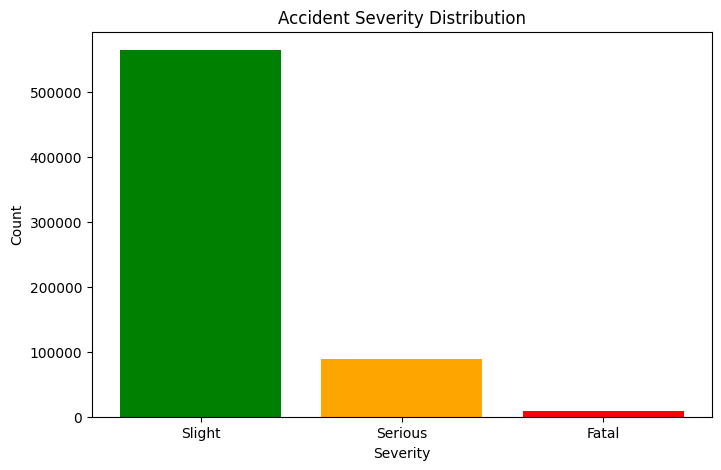

In [28]:
import matplotlib.pyplot as plt

# Data
severity = ['Slight', 'Serious', 'Fatal']
count = [563801, 88217, 8661]

# Create a bar chart
plt.figure(figsize=(8, 5))
plt.bar(severity, count, color=['green', 'orange', 'red'])

# Add titles and labels
plt.title('Accident Severity Distribution')
plt.xlabel('Severity')
plt.ylabel('Count')
plt.show()


In [29]:
accident['Year'] = accident['Accident Date'].dt.year

In [30]:
accident['Month'] = accident['Accident Date'].dt.month

In [31]:
accident['Day'] = accident['Accident Date'].dt.day

In [32]:
accident['DayOfWeek'] = accident['Accident Date'].dt.dayofweek

In [33]:
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
Year                       0
Month                      0
Day                        0
DayOfWeek                  0
dtype: int64

In [34]:
accident['Year'] == 2019

0          True
1          True
2         False
3         False
4          True
          ...  
660674    False
660675    False
660676    False
660677    False
660678    False
Name: Year, Length: 660679, dtype: bool

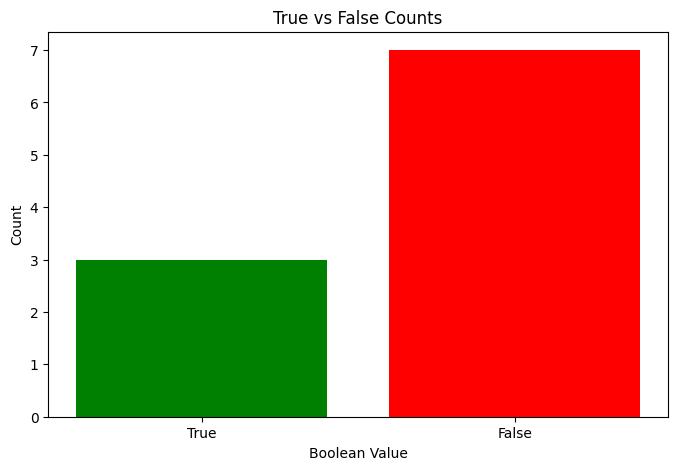

In [35]:
import matplotlib.pyplot as plt

# Data: Boolean series
data = [True, True, False, False, True, False, False, False, False, False]  # example data

# Count the number of True and False values
true_count = sum(data)
false_count = len(data) - true_count

# Create the bar chart
plt.figure(figsize=(8, 5))
plt.bar(['True', 'False'], [true_count, false_count], color=['green', 'red'])

# Add titles and labels
plt.title('True vs False Counts')
plt.xlabel('Boolean Value')
plt.ylabel('Count')
plt.show()


In [36]:
accident[accident['Year'] == 2019]

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
0,200701BS64157,Serious,2019-05-06,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,5,6,0
1,200701BS65737,Serious,2019-02-07,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,2019,2,7,3
4,200701BS66837,Slight,2019-03-09,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,Single carriageway,Urban,Fine no high winds,Other vehicle,2019,3,9,5
6,200701BS67207,Serious,2019-05-09,51.501405,Daylight,Kensington and Chelsea,-0.161577,1,2,Dry,Dual carriageway,Urban,Fine no high winds,Van / Goods 3.5 tonnes mgw or under,2019,5,9,3
7,200701BS67370,Fatal,2019-03-10,51.482260,Darkness - lights lit,Kensington and Chelsea,-0.179486,3,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,3,10,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182097,2.01E+12,Slight,2019-07-11,55.212275,Darkness - no lighting,Dumfries and Galloway,-3.413007,1,2,Dry,Dual carriageway,Rural,Fine no high winds,Car,2019,7,11,3
182101,2.01E+12,Slight,2019-02-12,55.009139,Daylight,Dumfries and Galloway,-3.319379,1,1,Wet or damp,Single carriageway,Rural,Fine no high winds,Car,2019,2,12,1
182102,2.01E+12,Slight,2019-03-12,54.993061,Daylight,Dumfries and Galloway,-3.131122,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2019,3,12,1
182103,2.01E+12,Serious,2019-06-12,55.127391,Darkness - lights lit,Dumfries and Galloway,-3.439964,1,2,Wet or damp,Single carriageway,Rural,Raining no high winds,Motorcycle over 500cc,2019,6,12,2


In [37]:
df_2019 = accident[accident['Year'] == 2019]

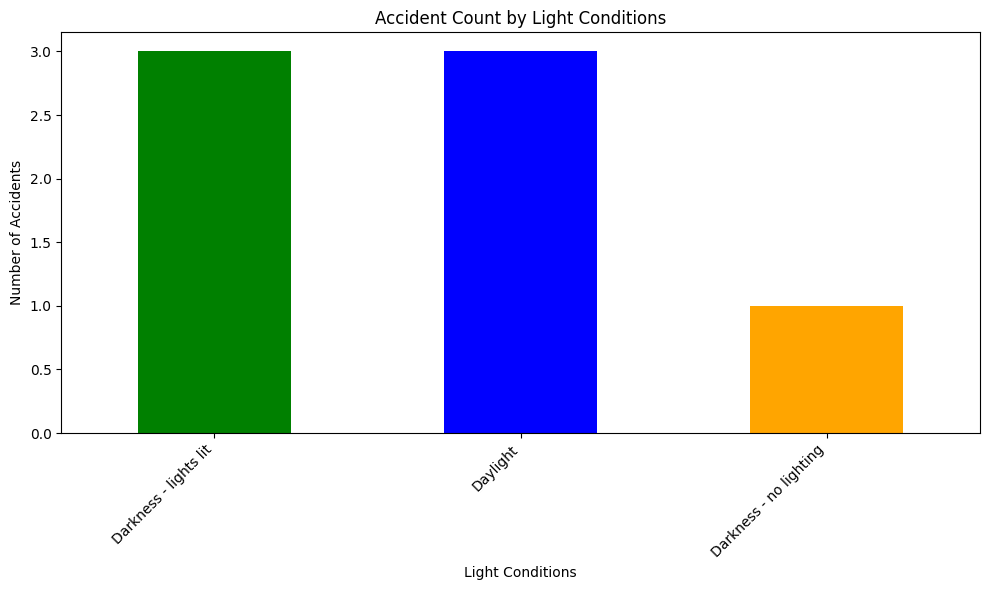

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data - create a DataFrame
data = {
    'Accident_Severity': ['Serious', 'Serious', 'Slight', 'Serious', 'Fatal', 'Slight', 'Slight'],
    'Light_Conditions': ['Darkness - lights lit', 'Daylight', 'Darkness - lights lit', 
                         'Daylight', 'Darkness - lights lit', 'Darkness - no lighting', 'Daylight'],
    'Year': [2019, 2019, 2019, 2019, 2019, 2019, 2019],
    'District Area': ['Kensington and Chelsea', 'Kensington and Chelsea', 'Kensington and Chelsea',
                      'Kensington and Chelsea', 'Kensington and Chelsea', 'Dumfries and Galloway', 'Dumfries and Galloway']
}

df = pd.DataFrame(data)

# Count the number of accidents for each Light_Condition
light_condition_counts = df['Light_Conditions'].value_counts()

# Create the bar chart
plt.figure(figsize=(10, 6))
light_condition_counts.plot(kind='bar', color=['green', 'blue', 'orange', 'gray'])

# Add titles and labels
plt.title('Accident Count by Light Conditions')
plt.xlabel('Light Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping

# Show the plot
plt.show()


In [39]:
df_2019

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
0,200701BS64157,Serious,2019-05-06,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,5,6,0
1,200701BS65737,Serious,2019-02-07,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,2019,2,7,3
4,200701BS66837,Slight,2019-03-09,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,Single carriageway,Urban,Fine no high winds,Other vehicle,2019,3,9,5
6,200701BS67207,Serious,2019-05-09,51.501405,Daylight,Kensington and Chelsea,-0.161577,1,2,Dry,Dual carriageway,Urban,Fine no high winds,Van / Goods 3.5 tonnes mgw or under,2019,5,9,3
7,200701BS67370,Fatal,2019-03-10,51.482260,Darkness - lights lit,Kensington and Chelsea,-0.179486,3,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,3,10,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182097,2.01E+12,Slight,2019-07-11,55.212275,Darkness - no lighting,Dumfries and Galloway,-3.413007,1,2,Dry,Dual carriageway,Rural,Fine no high winds,Car,2019,7,11,3
182101,2.01E+12,Slight,2019-02-12,55.009139,Daylight,Dumfries and Galloway,-3.319379,1,1,Wet or damp,Single carriageway,Rural,Fine no high winds,Car,2019,2,12,1
182102,2.01E+12,Slight,2019-03-12,54.993061,Daylight,Dumfries and Galloway,-3.131122,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2019,3,12,1
182103,2.01E+12,Serious,2019-06-12,55.127391,Darkness - lights lit,Dumfries and Galloway,-3.439964,1,2,Wet or damp,Single carriageway,Rural,Raining no high winds,Motorcycle over 500cc,2019,6,12,2


<h1>Daylight constitue to 73.05% of the total accidents from year 2019.</h1>

In [40]:
df_2019['Light_Conditions'].value_counts()

Light_Conditions
Daylight                       52518
Darkness - lights lit          14124
Darkness - no lighting          4242
Darkness - lighting unknown      719
Darkness - lights unlit          264
Name: count, dtype: int64

C:\Users\LAB4-StudentPC46\AppData\Local\Temp\ipykernel_20176\3197526962.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(light_conditions.values()), y=list(light_conditions.keys()), palette="coolwarm")


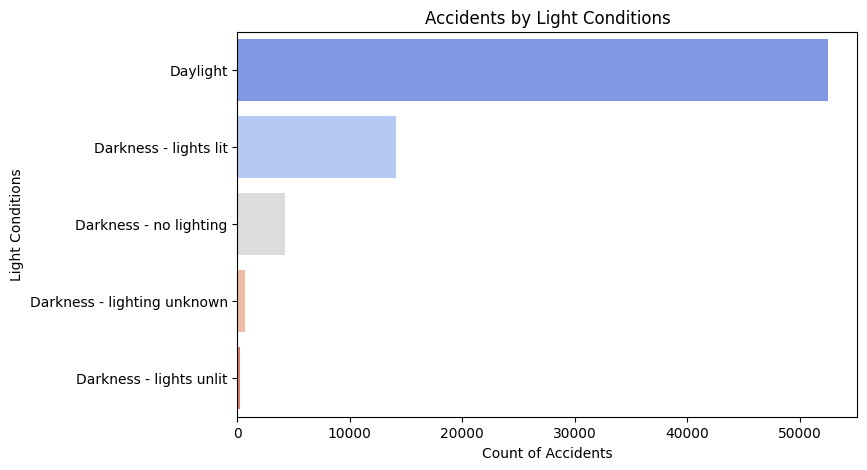

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data for Light Conditions
light_conditions = {
    "Daylight": 52518,
    "Darkness - lights lit": 14124,
    "Darkness - no lighting": 4242,
    "Darkness - lighting unknown": 719,
    "Darkness - lights unlit": 264
}

# Create a bar chart for Light Conditions
plt.figure(figsize=(8, 5))
sns.barplot(x=list(light_conditions.values()), y=list(light_conditions.keys()), palette="coolwarm")

# Labels and title
plt.xlabel("Count of Accidents")
plt.ylabel("Light Conditions")
plt.title("Accidents by Light Conditions")

# Display the plot
plt.show()


In [41]:
accident_per_year = accident['Year'].value_counts().sort_index()

<h1>2019 has the highest number of the accident</h1>

In [42]:
accident_per_year

Year
2019     71867
2020     70163
2021    461844
2022     56805
Name: count, dtype: int64

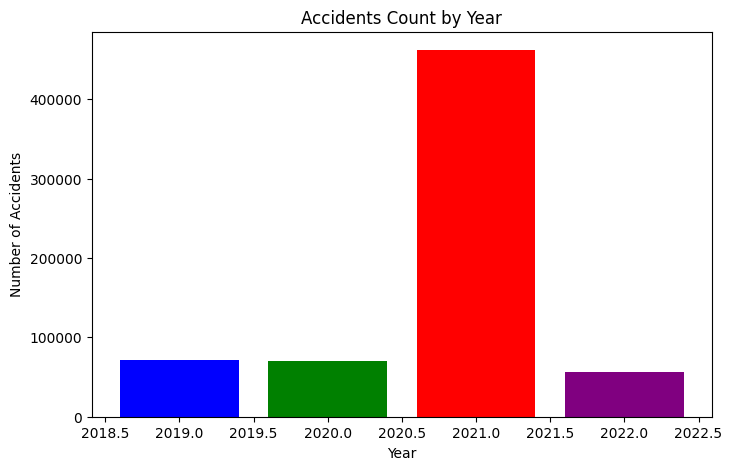

In [43]:
import matplotlib.pyplot as plt

# Data for Year and Count of Accidents
years = [2019, 2020, 2021, 2022]
counts = [71867, 70163, 461844, 56805]

# Create the bar chart
plt.figure(figsize=(8, 5))
plt.bar(years, counts, color=['blue', 'green', 'red', 'purple'])

# Add titles and labels
plt.title('Accidents Count by Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')

# Show the plot
plt.show()


<h1>The number of accidents through the years has decreased.</h1>

In [44]:
Number_of_Casualties = accident['Road_Type'].value_counts().sort_index()

In [45]:
Number_of_Casualties

Road_Type
Dual carriageway       99424
One way street         13559
Roundabout             43992
Single carriageway    496663
Slip road               7041
Name: count, dtype: int64

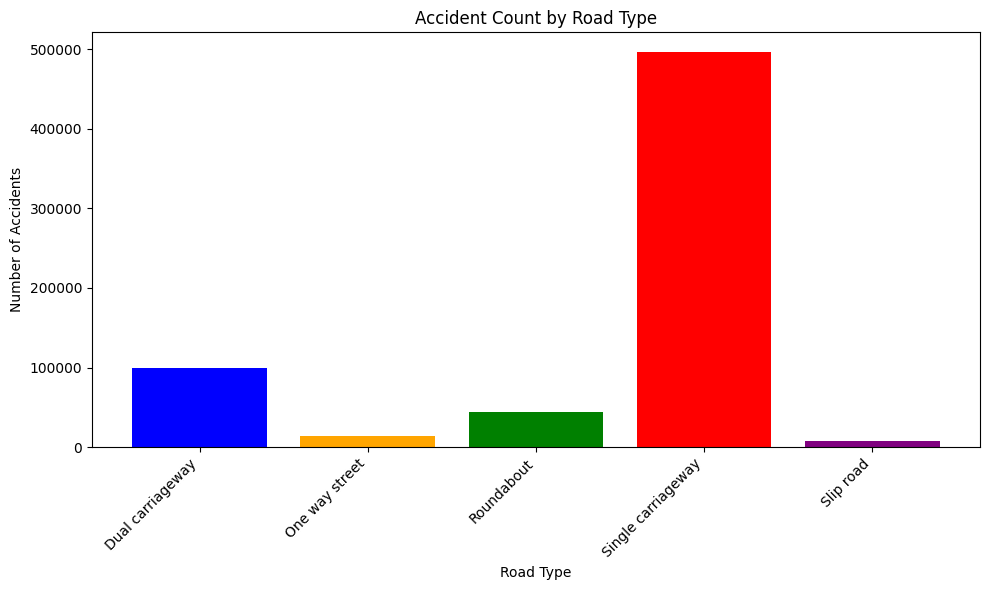

In [46]:
import matplotlib.pyplot as plt

# Data for Road Types and Counts
road_types = ['Dual carriageway', 'One way street', 'Roundabout', 'Single carriageway', 'Slip road']
counts = [99424, 13559, 43992, 496663, 7041]

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(road_types, counts, color=['blue', 'orange', 'green', 'red', 'purple'])

# Add titles and labels
plt.title('Accident Count by Road Type')
plt.xlabel('Road Type')
plt.ylabel('Number of Accidents')

# Rotate x labels for better readability
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to prevent clipping

# Show the plot
plt.show()


<h1>The Single carrieageway has the highest number of casualties. While slip road has the lowest number of casualties.</h1>

In [47]:
Number_of_Casualties = accident['Vehicle_Type'].value_counts().sort_index()

In [48]:
Number_of_Casualties

Vehicle_Type
Agricultural vehicle                       1947
Bus or coach (17 or more pass seats)      25878
Car                                      497992
Data missing or out of range                  6
Goods 7.5 tonnes mgw and over             17307
Goods over 3.5t. and under 7.5t            6096
Minibus (8 - 16 passenger seats)           1976
Motorcycle 125cc and under                15269
Motorcycle 50cc and under                  7603
Motorcycle over 125cc and up to 500cc      7656
Motorcycle over 500cc                     25657
Other vehicle                              5637
Pedal cycle                                 197
Ridden horse                                  4
Taxi/Private hire car                     13294
Van / Goods 3.5 tonnes mgw or under       34160
Name: count, dtype: int64

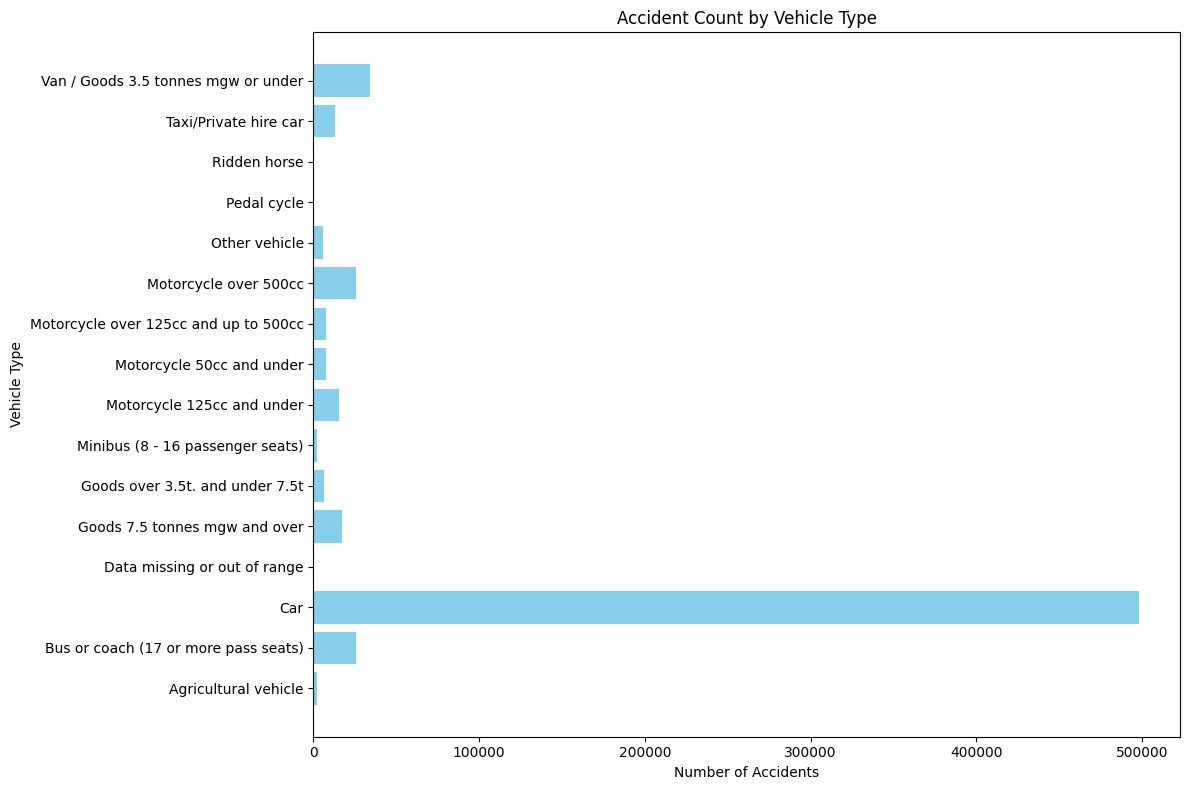

In [49]:
import matplotlib.pyplot as plt

# Data for Vehicle Types and Counts
vehicle_types = [
    'Agricultural vehicle', 'Bus or coach (17 or more pass seats)', 'Car', 
    'Data missing or out of range', 'Goods 7.5 tonnes mgw and over', 
    'Goods over 3.5t. and under 7.5t', 'Minibus (8 - 16 passenger seats)', 
    'Motorcycle 125cc and under', 'Motorcycle 50cc and under', 
    'Motorcycle over 125cc and up to 500cc', 'Motorcycle over 500cc', 
    'Other vehicle', 'Pedal cycle', 'Ridden horse', 'Taxi/Private hire car', 
    'Van / Goods 3.5 tonnes mgw or under'
]
counts = [
    1947, 25878, 497992, 6, 17307, 6096, 1976, 15269, 7603, 7656, 25657, 
    5637, 197, 4, 13294, 34160
]

# Create the bar chart
plt.figure(figsize=(12, 8))
plt.barh(vehicle_types, counts, color='skyblue')

# Add titles and labels
plt.title('Accident Count by Vehicle Type')
plt.xlabel('Number of Accidents')
plt.ylabel('Vehicle Type')

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


<h1>Van has the highest number of casualties</h1>

In [50]:
accident_per_year = accident['Vehicle_Type'].value_counts().sort_index()

In [51]:
accident_per_year

Vehicle_Type
Agricultural vehicle                       1947
Bus or coach (17 or more pass seats)      25878
Car                                      497992
Data missing or out of range                  6
Goods 7.5 tonnes mgw and over             17307
Goods over 3.5t. and under 7.5t            6096
Minibus (8 - 16 passenger seats)           1976
Motorcycle 125cc and under                15269
Motorcycle 50cc and under                  7603
Motorcycle over 125cc and up to 500cc      7656
Motorcycle over 500cc                     25657
Other vehicle                              5637
Pedal cycle                                 197
Ridden horse                                  4
Taxi/Private hire car                     13294
Van / Goods 3.5 tonnes mgw or under       34160
Name: count, dtype: int64

C:\Users\LAB4-StudentPC46\AppData\Local\Temp\ipykernel_20176\1665177539.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(sorted_vehicle_type.values()), y=list(sorted_vehicle_type.keys()), palette="magma")


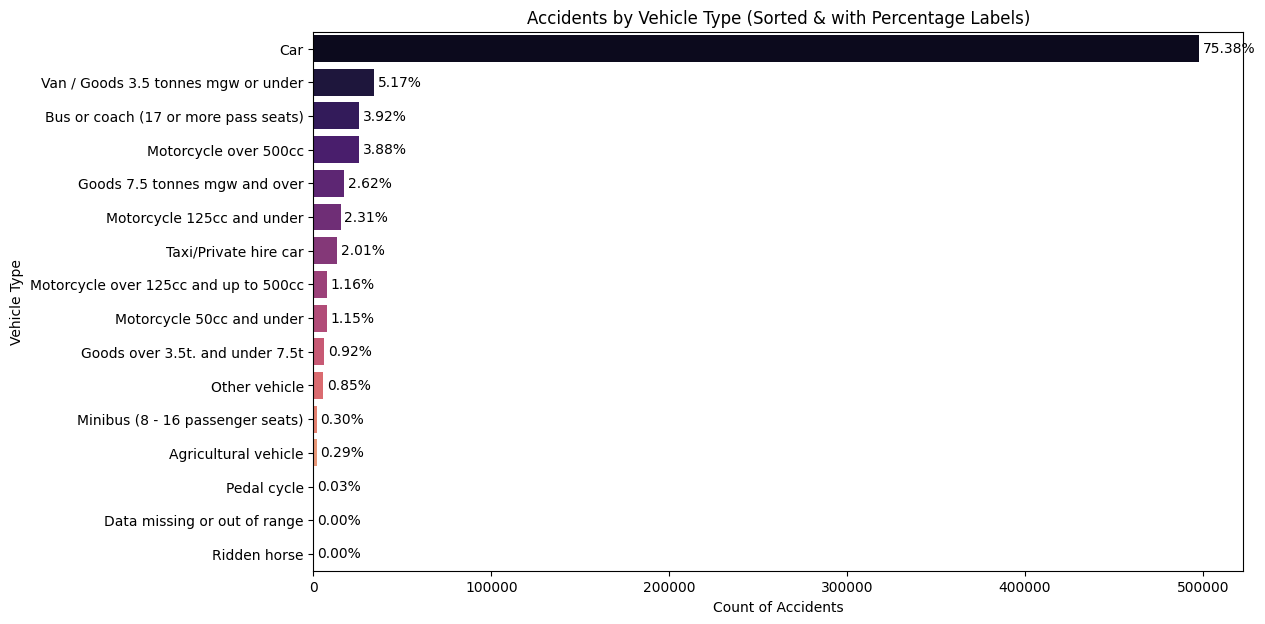

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data for Vehicle Type
vehicle_type = {
    "Agricultural vehicle": 1947,
    "Bus or coach (17 or more pass seats)": 25878,
    "Car": 497992,
    "Data missing or out of range": 6,
    "Goods 7.5 tonnes mgw and over": 17307,
    "Goods over 3.5t. and under 7.5t": 6096,
    "Minibus (8 - 16 passenger seats)": 1976,
    "Motorcycle 125cc and under": 15269,
    "Motorcycle 50cc and under": 7603,
    "Motorcycle over 125cc and up to 500cc": 7656,
    "Motorcycle over 500cc": 25657,
    "Other vehicle": 5637,
    "Pedal cycle": 197,
    "Ridden horse": 4,
    "Taxi/Private hire car": 13294,
    "Van / Goods 3.5 tonnes mgw or under": 34160
}

# Sort vehicle types by count in descending order
sorted_vehicle_type = dict(sorted(vehicle_type.items(), key=lambda item: item[1], reverse=True))

# Create a bar chart for Vehicle Type (sorted)
plt.figure(figsize=(12, 7))
ax = sns.barplot(x=list(sorted_vehicle_type.values()), y=list(sorted_vehicle_type.keys()), palette="magma")

# Add labels to show percentages
total_accidents = sum(sorted_vehicle_type.values())
for i, value in enumerate(sorted_vehicle_type.values()):
    percentage = (value / total_accidents) * 100
    ax.text(value + 2000, i, f"{percentage:.2f}%", va='center', fontsize=10)  # Adjust text position

# Labels and title
plt.xlabel("Count of Accidents")
plt.ylabel("Vehicle Type")
plt.title("Accidents by Vehicle Type (Sorted & with Percentage Labels)")

# Display the plot
plt.show()


In [52]:
df_2020 = accident[accident['Year'] == 2020]

In [53]:
df_2021 = accident[accident['Year'] == 2021]

In [54]:
df_2022 = accident[accident['Year'] == 2022]

In [55]:
df_2020['Road_Surface_Conditions'].value_counts()

Road_Surface_Conditions
Dry                     43767
Wet or damp             23539
Frost or ice             2309
Snow                      370
Flood over 3cm. deep      178
Name: count, dtype: int64

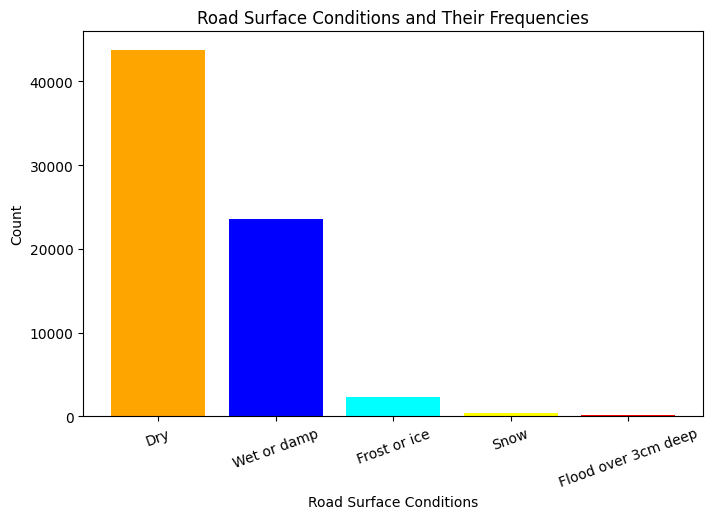

In [95]:
import matplotlib.pyplot as plt

# Data for road surface conditions
road_surface_conditions = ["Dry", "Wet or damp", "Frost or ice", "Snow", "Flood over 3cm deep"]
counts = [43767, 23539, 2309, 370, 178]

# Create bar plot
plt.figure(figsize=(8, 5))
plt.bar(road_surface_conditions, counts, color=['orange', 'blue', 'cyan', 'yellow', 'red'])
plt.xlabel("Road Surface Conditions")
plt.ylabel("Count")
plt.title("Road Surface Conditions and Their Frequencies")
plt.xticks(rotation=20)

# Show plot
plt.show()


<h1>Fine with high wind has the common number of casualties in 2020</h1>

In [56]:
df_2020.groupby('Weather_Conditions')['Number_of_Casualties'].value_counts()

C:\Users\LAB4-StudentPC46\AppData\Local\Temp\ipykernel_3528\3818285125.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_2020.groupby('Weather_Conditions')['Number_of_Casualties'].value_counts()


Weather_Conditions     Number_of_Casualties
Fine + high winds      1                       905
                       2                       237
                       3                        55
                       4                        29
                       5                         7
                                              ... 
Snowing no high winds  15                        0
                       17                        0
                       19                        0
                       21                        0
                       27                        0
Name: count, Length: 144, dtype: int64

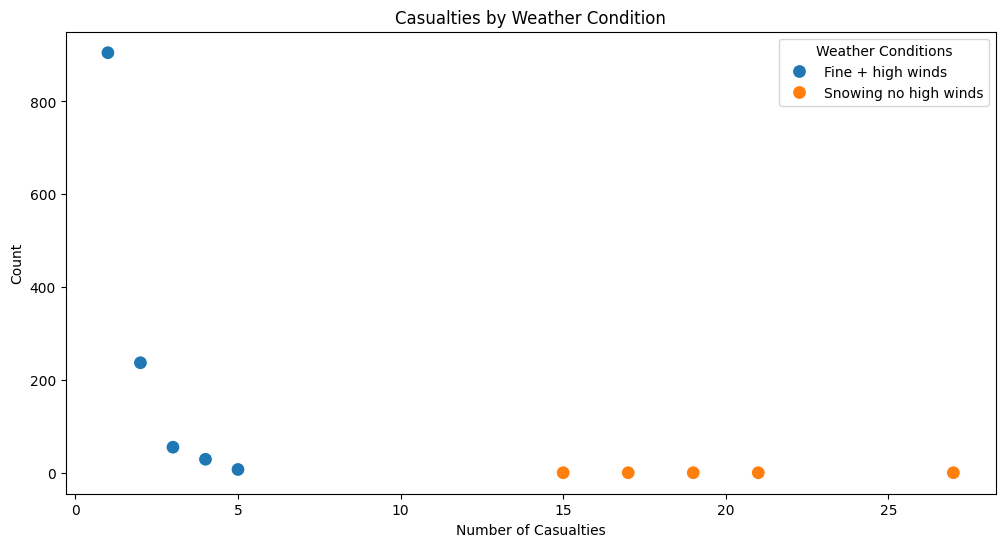

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data (first few rows for visualization purposes)
data = {
    "Weather_Conditions": [
        "Fine + high winds"] * 5 + ["Snowing no high winds"] * 5,
    "Number_of_Casualties": [1, 2, 3, 4, 5, 15, 17, 19, 21, 27],
    "Count": [905, 237, 55, 29, 7, 0, 0, 0, 0, 0]
}

df = pd.DataFrame(data)

# Visualization
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df,
    x="Number_of_Casualties",
    y="Count",
    hue="Weather_Conditions",
    palette="tab10",
    s=100
)
plt.xlabel("Number of Casualties")
plt.ylabel("Count")
plt.title("Casualties by Weather Condition")
plt.legend(title="Weather Conditions")
plt.show()


In [57]:
accident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
0,200701BS64157,Serious,2019-05-06,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,5,6,0
1,200701BS65737,Serious,2019-02-07,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,2019,2,7,3
2,200701BS66127,Serious,2021-11-02,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,Single carriageway,Urban,Fine no high winds,Taxi/Private hire car,2021,11,2,1
3,200701BS66128,Serious,2021-11-02,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),2021,11,2,1
4,200701BS66837,Slight,2019-03-09,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,Single carriageway,Urban,Fine no high winds,Other vehicle,2019,3,9,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,2021-11-02,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car,2021,11,2,1
660675,201091NM01881,Slight,2021-11-02,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2021,11,2,1
660676,201091NM01935,Slight,2021-11-02,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2021,11,2,1
660677,201091NM01964,Serious,2021-11-02,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc,2021,11,2,1


In [58]:
accident_per_area = accident['Urban_or_Rural_Area'].value_counts().sort_index()

In [59]:
accident_per_area

Urban_or_Rural_Area
Rural          238990
Unallocated        11
Urban          421678
Name: count, dtype: int64

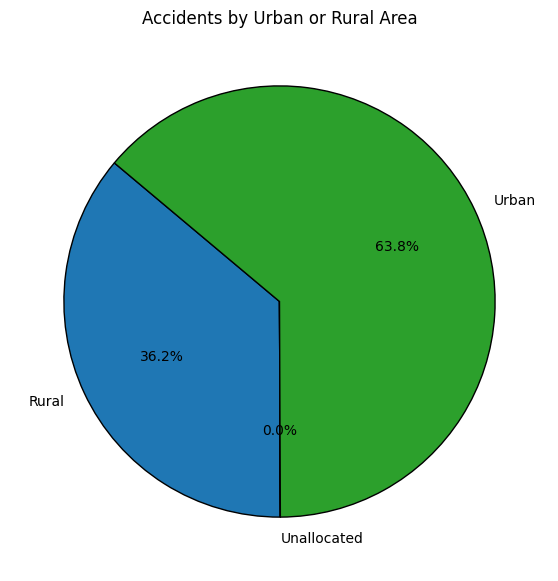

In [5]:
import matplotlib.pyplot as plt

# Data for Urban or Rural Area
urban_rural_data = {
    "Rural": 238990,
    "Unallocated": 11,
    "Urban": 421678
}

# Create a pie chart for Urban or Rural Area distribution
plt.figure(figsize=(7, 7))
plt.pie(urban_rural_data.values(), labels=urban_rural_data.keys(), autopct="%1.1f%%", 
        colors=["#1f77b4", "#ff7f0e", "#2ca02c"], startangle=140, wedgeprops={"edgecolor": "black"})

# Title
plt.title("Accidents by Urban or Rural Area")

# Display the plot
plt.show()


<h1>Accident are most likely to happen in Urban areas</h1>

In [60]:
accident_per_district = accident['District Area'].value_counts().sort_index()

In [61]:
accident_per_district

District Area
Aberdeen City    1323
Aberdeenshire    1930
Adur              619
Allerdale        1128
Alnwick           232
                 ... 
Wychavon         1361
Wycombe          1729
Wyre             1238
Wyre Forest       969
York             1897
Name: count, Length: 422, dtype: int64

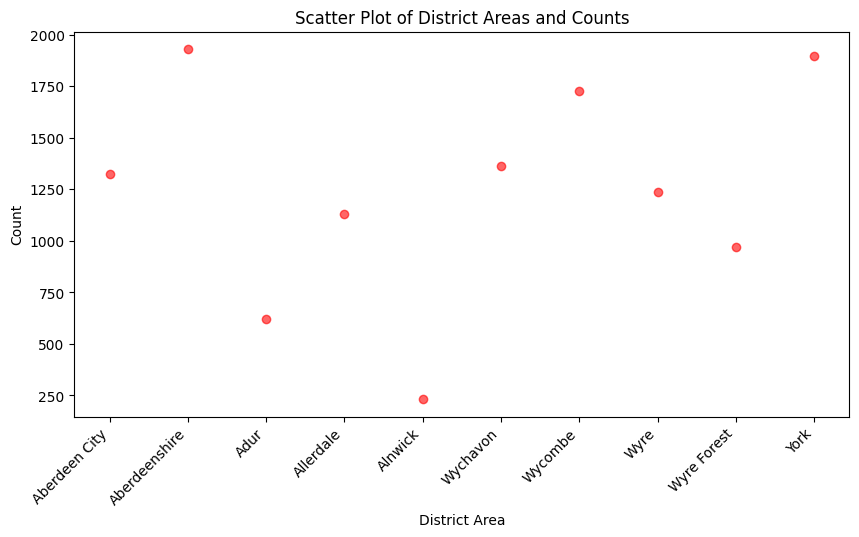

In [90]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (first few districts for visualization purposes)
districts = [
    "Aberdeen City", "Aberdeenshire", "Adur", "Allerdale", "Alnwick",
    "Wychavon", "Wycombe", "Wyre", "Wyre Forest", "York"
]
counts = [1323, 1930, 619, 1128, 232, 1361, 1729, 1238, 969, 1897]

# Assign numerical values to districts for x-axis
x_values = np.arange(len(districts))

# Scatter plot
plt.figure(figsize=(10, 5))
plt.scatter(x_values, counts, color='red', alpha=0.6)
plt.xticks(x_values, districts, rotation=45, ha="right")
plt.xlabel("District Area")
plt.ylabel("Count")
plt.title("Scatter Plot of District Areas and Counts")

# Show plot
plt.show()


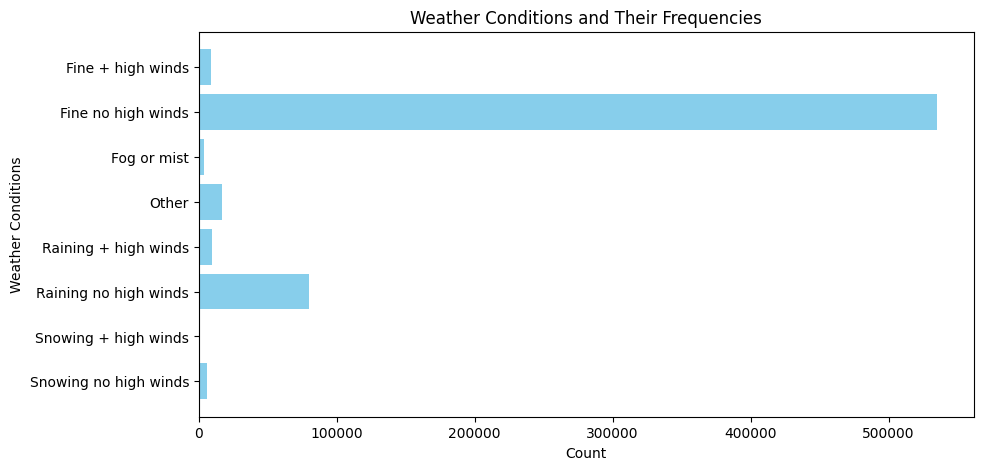

In [88]:
import matplotlib.pyplot as plt

# Data
weather_conditions = [
    "Fine + high winds", "Fine no high winds", "Fog or mist", "Other",
    "Raining + high winds", "Raining no high winds", "Snowing + high winds", "Snowing no high winds"
]
counts = [8554, 535013, 3528, 17150, 9615, 79696, 885, 6238]

# Plot
plt.figure(figsize=(10, 5))
plt.barh(weather_conditions, counts, color='skyblue')
plt.xlabel("Count")
plt.ylabel("Weather Conditions")
plt.title("Weather Conditions and Their Frequencies")
plt.gca().invert_yaxis()  # Invert y-axis for better readability

# Show plot
plt.show()


<h1>Accident are most likely to happen in York</h1>

In [62]:
accident_Weather_Conditions = accident['Weather_Conditions'].value_counts().sort_index()

In [63]:
accident_Weather_Conditions

Weather_Conditions
Fine + high winds          8554
Fine no high winds       535013
Fog or mist                3528
Other                     17150
Raining + high winds       9615
Raining no high winds     79696
Snowing + high winds        885
Snowing no high winds      6238
Name: count, dtype: int64

C:\Users\LAB4-StudentPC46\AppData\Local\Temp\ipykernel_20176\1562780118.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(weather_conditions.values()), y=list(weather_conditions.keys()), palette="coolwarm")


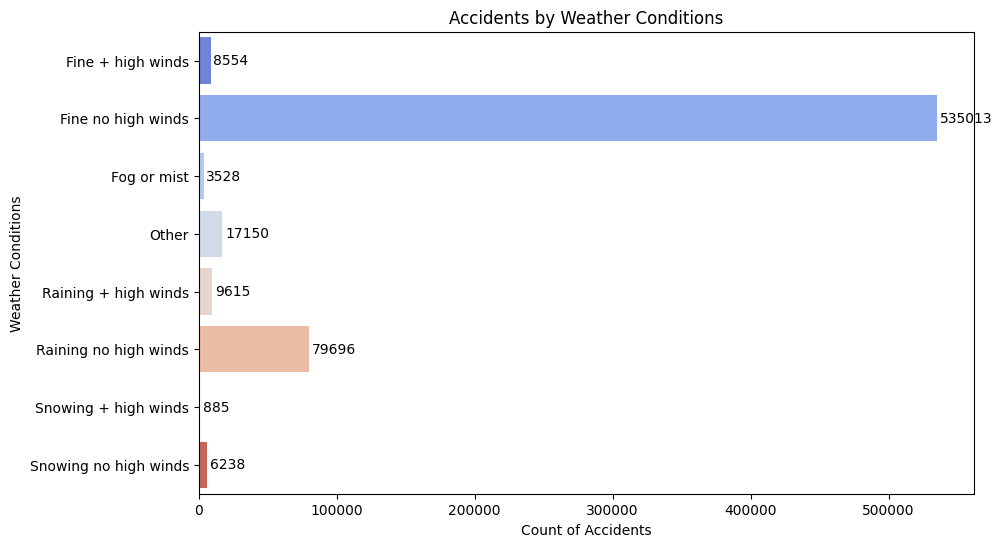

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data for Weather Conditions
weather_conditions = {
    "Fine + high winds": 8554,
    "Fine no high winds": 535013,
    "Fog or mist": 3528,
    "Other": 17150,
    "Raining + high winds": 9615,
    "Raining no high winds": 79696,
    "Snowing + high winds": 885,
    "Snowing no high winds": 6238
}

# Create a bar chart for Weather Conditions
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=list(weather_conditions.values()), y=list(weather_conditions.keys()), palette="coolwarm")

# Add labels to show counts
for i, value in enumerate(weather_conditions.values()):
    ax.text(value + 2000, i, f"{value}", va='center', fontsize=10)

# Labels and title
plt.xlabel("Count of Accidents")
plt.ylabel("Weather Conditions")
plt.title("Accidents by Weather Conditions")

# Display the plot
plt.show()


In [64]:
accident_Weather = accident ['Number_of_Casualties'].corr(accident['Number_of_Vehicles'])

In [65]:
accident_Weather

np.float64(0.2288888612692756)

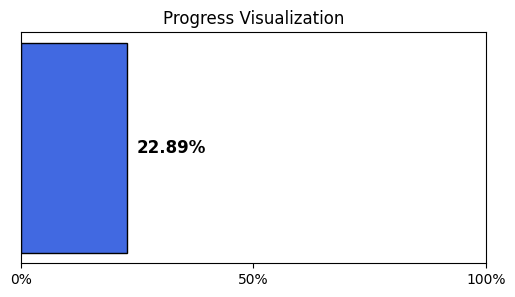

In [7]:
import matplotlib.pyplot as plt

# Value to visualize
value = 0.2288888612692756

# Create a gauge-style progress bar
fig, ax = plt.subplots(figsize=(6, 3))
ax.barh(y=0, width=value, height=0.4, color='royalblue', edgecolor='black')
ax.set_xlim(0, 1)
ax.set_xticks([0, 0.5, 1])
ax.set_xticklabels(["0%", "50%", "100%"])
ax.set_yticks([])
ax.set_title("Progress Visualization")

# Display the value as text
ax.text(value + 0.02, 0, f"{value:.2%}", va='center', fontsize=12, fontweight='bold')

# Show the plot
plt.show()


<h1>There is no correlation between the number of casualties and the number of vehicles</h1>

In [66]:
accident_date = accident['Accident Date'].mode()[0]

In [67]:
accident_date

Timestamp('2021-11-02 00:00:00')

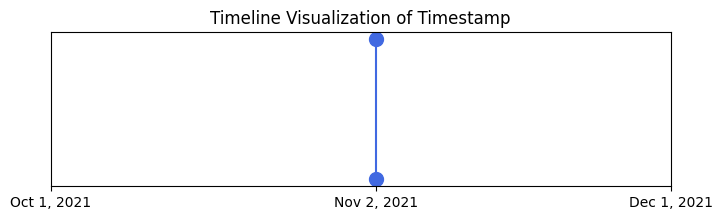

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the timestamp
timestamp = pd.Timestamp("2021-11-02 00:00:00")

# Create a simple timeline chart
fig, ax = plt.subplots(figsize=(8, 2))
ax.plot([timestamp, timestamp], [0, 1], marker="o", markersize=10, color="royalblue", linestyle="-")

# Formatting the timeline
ax.set_xlim(pd.Timestamp("2021-10-01"), pd.Timestamp("2021-12-01"))  # Show surrounding months for context
ax.set_xticks([pd.Timestamp("2021-10-01"), timestamp, pd.Timestamp("2021-12-01")])
ax.set_xticklabels(["Oct 1, 2021", "Nov 2, 2021", "Dec 1, 2021"])
ax.set_yticks([])  # Hide the y-axis ticks for a clean timeline
ax.set_title("Timeline Visualization of Timestamp")

# Show the plot
plt.show()


<h1>2021-02-11 has the highest accident.</h1>

In [68]:
accident[accident['Accident Date'] == accident_date].count()['Index']

np.int64(396357)

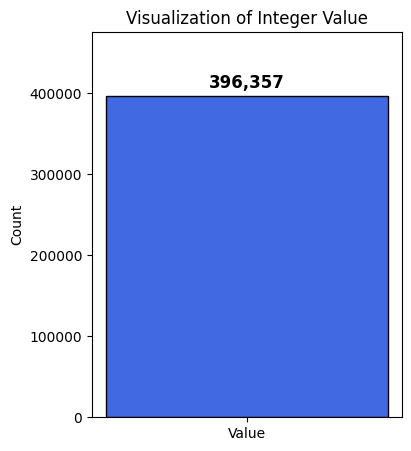

In [9]:
import matplotlib.pyplot as plt

# Define the integer value
value = 396357

# Create a bar chart
plt.figure(figsize=(4, 5))
plt.bar(x=["Value"], height=[value], color="royalblue", edgecolor="black")

# Add label on top of the bar
plt.text(0, value + 10000, f"{value:,}", ha='center', fontsize=12, fontweight='bold')

# Labels and title
plt.ylabel("Count")
plt.title("Visualization of Integer Value")

# Show the plot
plt.ylim(0, value * 1.2)  # Adjust y-axis limit for better visibility
plt.show()


In [69]:
accident.dtypes

Index                              object
Accident_Severity                category
Accident Date              datetime64[ns]
Latitude                         category
Light_Conditions                 category
District Area                    category
Longitude                        category
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions          category
Road_Type                        category
Urban_or_Rural_Area              category
Weather_Conditions               category
Vehicle_Type                     category
Year                                int32
Month                               int32
Day                                 int32
DayOfWeek                           int32
dtype: object

In [70]:
accident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
0,200701BS64157,Serious,2019-05-06,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,5,6,0
1,200701BS65737,Serious,2019-02-07,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,2019,2,7,3
2,200701BS66127,Serious,2021-11-02,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,Single carriageway,Urban,Fine no high winds,Taxi/Private hire car,2021,11,2,1
3,200701BS66128,Serious,2021-11-02,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),2021,11,2,1
4,200701BS66837,Slight,2019-03-09,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,Single carriageway,Urban,Fine no high winds,Other vehicle,2019,3,9,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,2021-11-02,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car,2021,11,2,1
660675,201091NM01881,Slight,2021-11-02,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2021,11,2,1
660676,201091NM01935,Slight,2021-11-02,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2021,11,2,1
660677,201091NM01964,Serious,2021-11-02,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc,2021,11,2,1


In [71]:
accident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
0,200701BS64157,Serious,2019-05-06,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,5,6,0
1,200701BS65737,Serious,2019-02-07,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,2019,2,7,3
2,200701BS66127,Serious,2021-11-02,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,Single carriageway,Urban,Fine no high winds,Taxi/Private hire car,2021,11,2,1
3,200701BS66128,Serious,2021-11-02,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),2021,11,2,1
4,200701BS66837,Slight,2019-03-09,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,Single carriageway,Urban,Fine no high winds,Other vehicle,2019,3,9,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,2021-11-02,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car,2021,11,2,1
660675,201091NM01881,Slight,2021-11-02,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2021,11,2,1
660676,201091NM01935,Slight,2021-11-02,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2021,11,2,1
660677,201091NM01964,Serious,2021-11-02,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc,2021,11,2,1


In [72]:
accident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
0,200701BS64157,Serious,2019-05-06,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,5,6,0
1,200701BS65737,Serious,2019-02-07,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,2019,2,7,3
2,200701BS66127,Serious,2021-11-02,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,Single carriageway,Urban,Fine no high winds,Taxi/Private hire car,2021,11,2,1
3,200701BS66128,Serious,2021-11-02,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),2021,11,2,1
4,200701BS66837,Slight,2019-03-09,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,Single carriageway,Urban,Fine no high winds,Other vehicle,2019,3,9,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,2021-11-02,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car,2021,11,2,1
660675,201091NM01881,Slight,2021-11-02,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2021,11,2,1
660676,201091NM01935,Slight,2021-11-02,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2021,11,2,1
660677,201091NM01964,Serious,2021-11-02,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc,2021,11,2,1


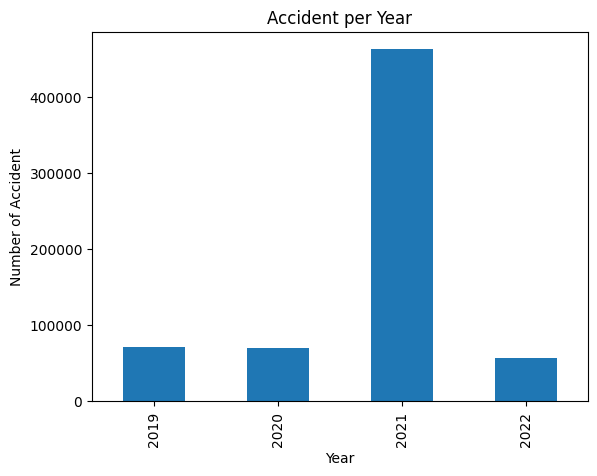

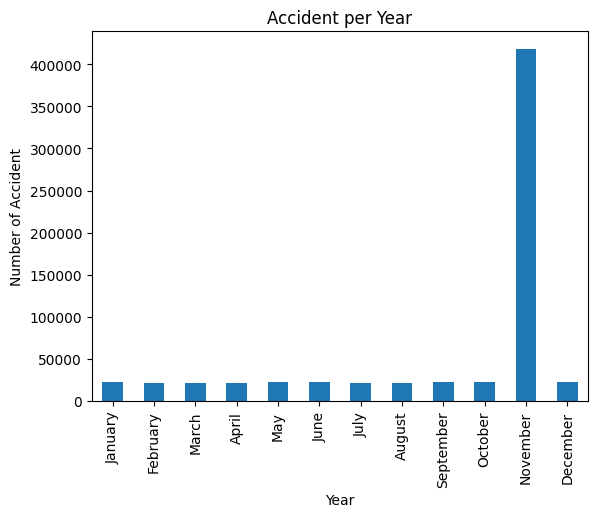

DayOfWeek
Monday        35715
Tuesday      435373
Wednesday     37548
Thursday      38009
Friday        38511
Saturday      37751
Sunday        37772
Name: count, dtype: int64


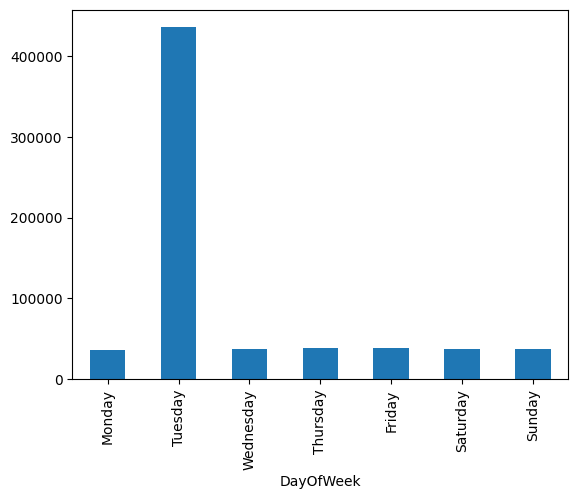

In [73]:
accident_per_year = accident['Year'].value_counts().sort_index()

accident_per_month = accident['Month'].value_counts().sort_index()

accident_per_year.plot(kind='bar')
plt.title('Accident per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accident')
plt.show()

month_names ={
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August', 
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}
accident_per_month.index = accident_per_month.index.map(month_names)

accident_per_month.plot(kind='bar')
plt.title('Accident per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accident')
plt.show()

accident_per_day = accident['DayOfWeek'].value_counts().sort_index()

day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday',
} 

accident_per_day.index = accident_per_day.index.map(day_names)
accident_per_day.plot(kind='bar')
print(accident_per_day)

<h1>Line Plot</h1>

C:\Users\LAB4-StudentPC46\AppData\Local\Temp\ipykernel_3528\2462556314.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  year_area = accident.groupby(['District Area', 'Year']).size().reset_index(name='Accident_Count')


<function matplotlib.pyplot.show(close=None, block=None)>

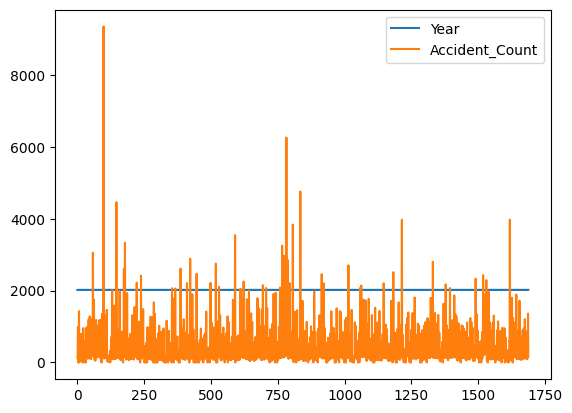

In [79]:
year_area = accident.groupby(['District Area', 'Year']).size().reset_index(name='Accident_Count')

year_area.plot()

plt.show

C:\Users\LAB4-StudentPC46\AppData\Local\Temp\ipykernel_3528\2475669116.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  year_area = accident.groupby(['District Area', 'Year']).size().reset_index(name='Accident_Count')


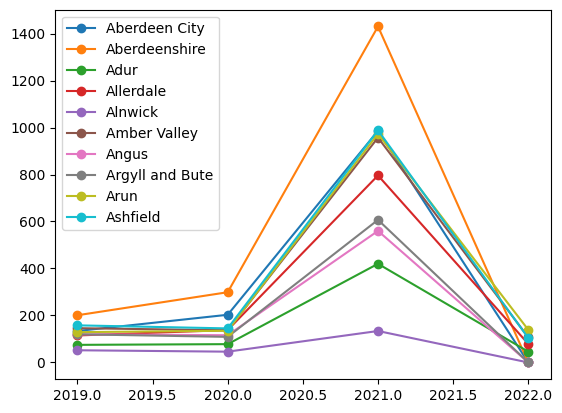

In [86]:
year_area = accident.groupby(['District Area', 'Year']).size().reset_index(name='Accident_Count')
#pivot table
easy_df = year_area.pivot(index='Year', columns='District Area', values='Accident_Count')

#lineplot
#(x,y)
plt.plot(easy_df.index,easy_df['Aberdeen City'], label='Aberdeen City', marker ='o')
plt.plot(easy_df.index,easy_df['Aberdeenshire'], label='Aberdeenshire', marker ='o')
plt.plot(easy_df.index,easy_df['Adur'], label='Adur', marker ='o')
plt.plot(easy_df.index,easy_df['Allerdale'], label='Allerdale', marker ='o')
plt.plot(easy_df.index,easy_df['Alnwick'], label='Alnwick', marker ='o')
plt.plot(easy_df.index,easy_df['Amber Valley'], label='Amber Valley', marker ='o')
plt.plot(easy_df.index,easy_df['Angus'], label='Angus', marker ='o')
plt.plot(easy_df.index,easy_df['Argyll and Bute'], label='Argyll and Bute', marker ='o')
plt.plot(easy_df.index,easy_df['Arun'], label='Arun', marker ='o')
plt.plot(easy_df.index,easy_df['Ashfield'], label='Ashfield', marker ='o')

plt.legend()
plt.show()

C:\Users\LAB4-StudentPC46\AppData\Local\Temp\ipykernel_3528\853173836.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cas_sev = accident.groupby(['Accident_Severity','DayOfWeek'])['Number_of_Casualties'].mean().reset_index(name='average accident')


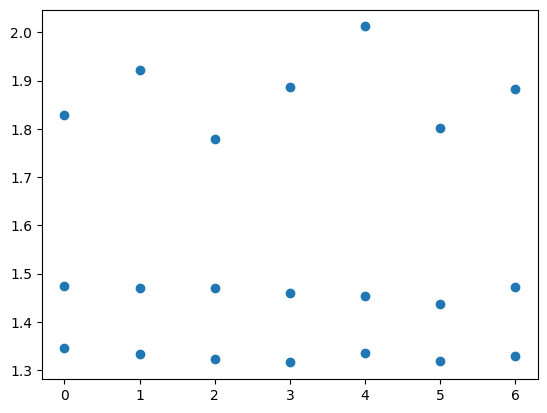

In [87]:
#Number_of_Casualties, Accident_Severity
cas_sev = accident.groupby(['Accident_Severity','DayOfWeek'])['Number_of_Casualties'].mean().reset_index(name='average accident')

#cas_sev
plt.scatter(cas_sev['DayOfWeek'],cas_sev['average accident'])
plt.show()